Instalar depencencias y 

In [1]:
!pip install tensorflow tensorflow-gpu pandas sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 578.1 MB 8.4 kB/s 
     |████████████████████████████████| 578.1 MB 6.9 kB/s 
     |████████████████████████████████| 511.8 MB 26 kB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=603a41230ae09b2fda505299b277dcb1102853a163b680885b9dcc800f909317
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense
from keras.layers import Embedding
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


In [3]:
# Adicional
!install h5py

install: missing destination file operand after 'h5py'
Try 'install --help' for more information.


In [4]:
from google.colab import drive 

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
os.path.join("/content/drive/MyDrive/Factoria F5/youtoxic/youtoxic_english_1000.csv")

'/content/drive/MyDrive/Factoria F5/youtoxic/youtoxic_english_1000.csv'

In [7]:
df = pd.read_csv(os.path.join("/content/drive/MyDrive/Factoria F5/youtoxic/youtoxic_english_1000.csv"))


In [8]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.tail()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False
999,UgjBJKQSoQMQ6ngCoAEC,XRuCW80L9mA,"God, the narrator has such an annoying lisp.",False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.iloc[6]['Text']

'Check out this you tube post. "Black man goes on an epic rant against Ferguson rioters."\n\nAlthough his message is delivered with childish, cartoon-ish emotions.... He is one of the very few African American\'s who gets it.'

In [11]:
df[df.columns[4:]].iloc[6]

IsAbusive          False
IsThreat           False
IsProvocative      False
IsObscene          False
IsHatespeech        True
IsRacist            True
IsNationalist      False
IsSexist           False
IsHomophobic       False
IsReligiousHate    False
IsRadicalism       False
Name: 6, dtype: bool

1. Preprocesado

In [12]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

In [13]:
from tensorflow.keras.layers import TextVectorization

In [14]:
X = df['Text']
y = df[df.columns[3:]].values.astype(int)

In [15]:
df[df.columns[3:]].values.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
df['Text']

0      If only people would just take a step back and...
1      Law enforcement is not trained to shoot to app...
2      \nDont you reckon them 'black lives matter' ba...
3      There are a very large number of people who do...
4      The Arab dude is absolutely right, he should h...
                             ...                        
995    I remember that they sent in the national defe...
996    Stats don`t represent the problem. Race baitin...
997    The quote from the mother... Wow that hit hard...
998                              this video is so racist
999        God, the narrator has such an annoying lisp. 
Name: Text, Length: 1000, dtype: object

In [17]:
MAX_FEATURES = 200000 #numero de palabaras en el vocabulario

In [18]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [19]:
vectorizer.adapt(X.values)

In [20]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([  1, 196, 154,   7, 211])>

In [21]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'and',
 'a',
 'of',
 'is',
 'that',
 'you',
 'in',
 'i',
 'this',
 'are',
 'it',
 'was',
 'they',
 'for',
 'people',
 'black',
 'not',
 'he',
 'have',
 'on',
 'be',
 'all',
 'if',
 'with',
 'police',
 'but',
 'what',
 'like',
 'just',
 'get',
 'his',
 'do',
 'white',
 'as',
 'so',
 'your',
 'no',
 'by',
 'about',
 'would',
 'there',
 'or',
 'at',
 'we',
 'them',
 'up',
 'who',
 'out',
 'their',
 'its',
 'brown',
 'dont',
 'an',
 'will',
 'when',
 'officer',
 'shot',
 'should',
 'because',
 'more',
 'from',
 'cop',
 'why',
 'how',
 'one',
 'these',
 'can',
 'my',
 'did',
 'video',
 'then',
 'him',
 'has',
 'some',
 'know',
 'me',
 'man',
 'being',
 'only',
 'cops',
 'over',
 'guy',
 'were',
 'had',
 '\xa0',
 'racist',
 'go',
 'fuck',
 'blacks',
 'time',
 'right',
 'need',
 'say',
 'race',
 'those',
 'down',
 'shit',
 'think',
 'off',
 'im',
 'been',
 'back',
 'see',
 'most',
 'make',
 'going',
 'even',
 'than',
 'here',
 'good',
 'still',
 'other',
 'nothi

In [22]:
vectorized_text = vectorizer(X.values)

In [23]:
len(X)

1000

In [24]:
vectorized_text

<tf.Tensor: shape=(1000, 1800), dtype=int64, numpy=
array([[  26,   82,   18, ...,    0,    0,    0],
       [ 169,  447,    7, ...,    0,    0,    0],
       [  55,    9, 2944, ...,    0,    0,    0],
       ...,
       [   2, 1158,   64, ...,    0,    0,    0],
       [  12,   73,    7, ...,    0,    0,    0],
       [ 229,    2, 3333, ...,    0,    0,    0]])>

In [25]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [26]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [27]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [28]:
len(test)

6

In [29]:
train_generator = train.as_numpy_iterator()

In [30]:
train_generator.next()

(array([[   8,  175,   61, ...,    0,    0,    0],
        [  55,    9, 2944, ...,    0,    0,    0],
        [  14,  979,   31, ...,    0,    0,    0],
        ...,
        [  11,  418,  475, ...,    0,    0,    0],
        [ 399,  406,    2, ...,    0,    0,    0],
        [ 143,   48,   84, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 0, 0, 0, 0,

2. Crear modelo secuencial

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense
from keras.layers import Embedding

In [32]:
y.shape

(1000, 12)

In [33]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(12, activation='sigmoid'))


In [35]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam',metrics=['binary_accuracy'])


In [36]:
# Early stopping  AAA
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='binary_accuracy', mode='max', verbose=1, save_best_only=True)

In [37]:
# fit the keras model on the dataset
#history = model.fit(train, epochs=9, validation_data=val)
history = model.fit(train, validation_data= val, epochs=500, verbose=0, callbacks=[es, mc])


Epoch 1: binary_accuracy improved from -inf to 0.85677, saving model to best_model.h5

Epoch 2: binary_accuracy improved from 0.85677 to 0.88258, saving model to best_model.h5

Epoch 3: binary_accuracy improved from 0.88258 to 0.88352, saving model to best_model.h5

Epoch 4: binary_accuracy improved from 0.88352 to 0.89062, saving model to best_model.h5

Epoch 5: binary_accuracy improved from 0.89062 to 0.90732, saving model to best_model.h5

Epoch 6: binary_accuracy improved from 0.90732 to 0.92614, saving model to best_model.h5

Epoch 7: binary_accuracy improved from 0.92614 to 0.93951, saving model to best_model.h5

Epoch 8: binary_accuracy improved from 0.93951 to 0.95348, saving model to best_model.h5

Epoch 9: binary_accuracy improved from 0.95348 to 0.95561, saving model to best_model.h5

Epoch 10: binary_accuracy improved from 0.95561 to 0.95821, saving model to best_model.h5

Epoch 11: binary_accuracy improved from 0.95821 to 0.96177, saving model to best_model.h5

Epoch 12: 

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 12)                1548      
                                                        

In [39]:
history = model.fit(train, epochs=3, validation_data=val)

Epoch 1/3
44/44 [==============================] - 4s 95ms/step - loss: 8.2582e-05 - binary_accuracy: 1.0000 - val_loss: 0.0043 - val_binary_accuracy: 0.9991
Epoch 2/3
44/44 [==============================] - 4s 91ms/step - loss: 0.0015 - binary_accuracy: 0.9998 - val_loss: 2.5578e-04 - val_binary_accuracy: 1.0000
Epoch 3/3
44/44 [==============================] - 4s 91ms/step - loss: 0.0107 - binary_accuracy: 0.9974 - val_loss: 0.0119 - val_binary_accuracy: 0.9978


In [40]:
history.history

{'loss': [8.25817696750164e-05, 0.001496537821367383, 0.010692230425775051],
 'binary_accuracy': [1.0, 0.9997633099555969, 0.997395932674408],
 'val_loss': [0.004300214815884829,
  0.00025577624910511076,
  0.01192829292267561],
 'val_binary_accuracy': [0.9991319179534912, 1.0, 0.9978299140930176]}

In [41]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

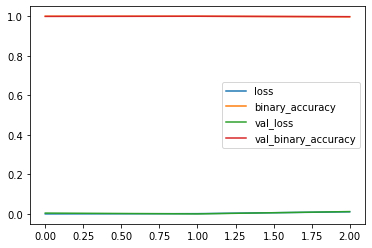

In [42]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

3. Make Prediction

In [43]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [44]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   9, 1820, 1117, ...,    0,    0,    0])>

In [45]:
df.columns[3:]

Index(['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
       'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic',
       'IsReligiousHate', 'IsRadicalism'],
      dtype='object')

In [46]:
batch = test.as_numpy_iterator().next()

In [47]:
batch_X, batch_y = test.as_numpy_iterator().next()


In [48]:
batch_y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [49]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 1s 687ms/step


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [50]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 0s 56ms/step


4. Evaluate model

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator():
  #unpack the batch
  X_true, y_true = batch
  #make a prediction
  yhat = model.predict(X_true)

  #flatten the predictions
  y_true = y_true.flatten()
  yhat= yhat.flatten()

  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 51ms/step


In [54]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision: 0.9754098653793335, Recall:1.0, Accuracy:0.9973958134651184


5. Test and gradio

In [55]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 17.5 MB/s 
     |████████████████████████████████| 278 kB 42.9 MB/s 
     |████████████████████████████████| 2.3 MB 54.8 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 213 kB 73.0 MB/s 
     |████████████████████████████████| 106 kB 76.4 MB/s 
     |████████████████████████████████| 54 kB 4.2 MB/s 
     |████████████████████████████████| 55 kB 5.1 MB/s 
     |████████████████████████████████| 84 kB 4.5 MB/s 
     |████████████████████████████████| 64 kB 3.9 MB/s 
     |████████████████████████████████| 80 kB 11.9 MB/s 
     |████████████████████████████████| 68 kB 9.5 MB/s 
     |████████████████████████████████| 68 kB 9.2 MB/s 
     |████████████████████████████████| 68 kB 9.7 MB/s 
     |████████████████████████████████| 68 kB 9.4

In [56]:
import tensorflow as tf
import gradio as gr

In [57]:
model.save('toxicity.h5')

In [58]:
model = tf.keras.models.load_model('toxicity.h5')

In [59]:
imput_str = vectorizer('hey i freaken you!. I am coming for you. I am going to hurt you.')

In [60]:
res = model.predict(np.expand_dims(imput_str,0))

1/1 [==============================] - 1s 669ms/step


In [61]:
res

array([[9.99948740e-01, 9.99952435e-01, 4.80996550e-06, 3.75441343e-01,
        3.96299629e-06, 1.89166354e-08, 5.14913125e-08, 8.01118893e-11,
        1.22090775e-11, 3.70056381e-11, 3.93462096e-10, 4.01199247e-11]],
      dtype=float32)

In [62]:
df.columns[3:-1]

Index(['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
       'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic',
       'IsReligiousHate'],
      dtype='object')

In [63]:
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)

  text = ''
  for idx,col in enumerate(df.columns[3:]):
    text += '{}: {}\n'.format(col, results[0][idx]>0.5)

  return text

In [64]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')


/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [65]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://b8a71299c9ecc4fa.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
